<a href="https://colab.research.google.com/github/rafs-santos/Learn_Methods/blob/main/My_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D-Convolution

In [67]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageFilter
from PIL import ImageDraw
import io

### Load image from raw file

In [68]:
DIR = "/content/drive/MyDrive/Data/Learn_Methods/"
#image_name = "lenna.raw"
#width_ = 256
#height_ = 256

image_name = "canaletto.raw"
width_ = 512
height_ = 512

A = np.fromfile(DIR + image_name, dtype='uint8', sep="")
A = np.reshape(A, (width_, height_))

# Converte image to Pillow
im = Image.fromarray(A)

#plt.imshow(A, cmap='gray')

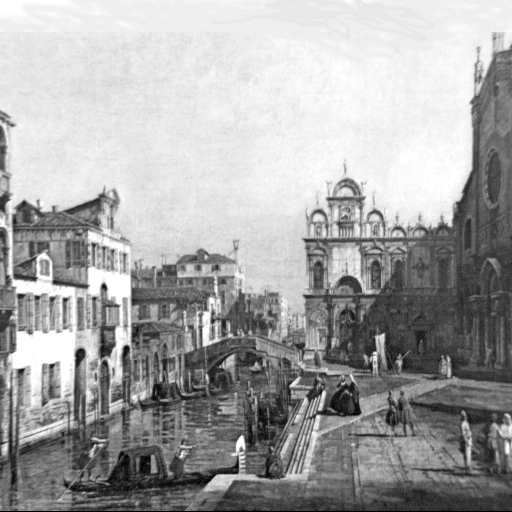

In [69]:
# Show image in Colab
im.rotate(-90)

### Reproducing this example

* [Example of 2D Convolution](http://www.songho.ca/dsp/convolution/convolution2d_example.html)

$y[m, n] = x[m,n]*h[m,n]=\sum_{j}\sum_i x[i,j]h[m-i,n-i]$

In [70]:
Kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
Input = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

Input

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [71]:
# First example using with concatenate input matrix
In = np.concatenate((np.zeros((3,1)),Input), axis=1)
In = np.concatenate((In, np.zeros((3,1))), axis=1)
In = np.concatenate((In, np.zeros((1,5))), axis=0)
In = np.concatenate((np.zeros((1,5)), In), axis=0)

Ker = Kernel

# See the result of concatenate
print(In)
print(Ker)

# pad is to shift [0,0] position of the kernel matrix
x_pad = len(Ker)//2
y_pad = len(Ker)//2

[[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [72]:
out = np.zeros_like(Input)
for p in range(3):
  for k in range(3):
    aux=0
    for j in range(-1+p,2+p):
      for i in range(-1+k, 2+k):
        out[p,k] += In[x_pad+j,y_pad+i]*Ker[p+x_pad-j,k+y_pad-i]
        #print(f"Input: {In[x_pad+j,y_pad+i]} pos: ({i}, {j})")
        #print(f"Input: {Ker[p+x_pad-j,k+y_pad-i]} pos: ({p+x_pad-j}, {k+x_pad-i})")
        #if k==1:
        #  pass
          #print(f"Input: {In[x_pad+i,y_pad+j]} pos: ({i}, {j})")
          #print(f"Input: {Ker[k+x_pad-i,y_pad-j]} pos: ({k+x_pad-i}, {x_pad-j})")
out

array([[-13, -20, -17],
       [-18, -24, -18],
       [ 13,  20,  17]])

### Trying apply without pad matrix

* [See the code from site 2D](http://www.songho.ca/dsp/convolution/convolution.html#cpp_conv2d)

### Apply filter from Wikipedia

* [Ridge detection and other](https://en.wikipedia.org/wiki/Kernel_(image_processing)

### This method, according to the website, is very slow. So the next step is to make this code fast

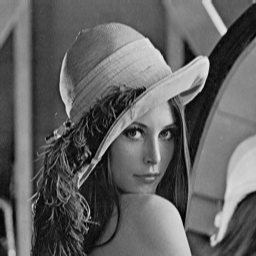

In [76]:
# Load Lenna Image
image_name = "lenna.raw"
width_ = 256
height_ = 256

Lenna = np.fromfile(DIR + image_name, dtype='uint8', sep="")
Lenna = np.reshape(Lenna, (width_, height_))

# Converte image to Pillow
img = Image.fromarray(Lenna.T)

img

In [77]:
#Kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])         # Identity
# Result not good
Ridge_Detection = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

Sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

Box_blur = (1/9)*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

Kernel = Box_blur

Input_img = Lenna.T
output = np.zeros_like(Lenna.T)

# Length of cols and row of kernel matrix
kCols = len(Kernel)
kRows = len(Kernel)

# New center of kernel matrix, where the center of matrix is [0,0]
kCenterX = kCols//2
kCenterY = kRows//2


# Length of cols and row of the image
rows = len(Lenna)
cols = len(Lenna)

for m in range(rows):
  for n in range(cols):
    
    for j in range(len(Kernel)):
      # Start of end of kernel matrix mm = 3-1-j where j = 0,1,2
      mm = kRows-1-j
      for i in range(len(Kernel)):
        # Start of end of kernel matrix nn = 3-1-i where i = 0,1,2
        nn = kCols -1 -i
        
        # Start out of matrix ii = 0+(1-2)=-1 where mm=2,1,0
        # So first ii =-1,0,1 after that 0,1,2 
        ii = m + (kCenterY - mm)
        # Start out of matrix jj = 0+(1-2)=-1 where nn=2,1,0
        jj = n + (kCenterX - nn)
        # ignore input samples which are out of bound
        if( ii >= 0 and ii < rows and jj >= 0 and jj < cols):
          output[m][n] += Input_img[ii][jj] * Kernel[mm][nn]
          # I don't know if a need do this =s
          if output[m][n] > 255:
            output[m][n] = 255
          elif output[m][n] < 0:
            output[m][n] = 0

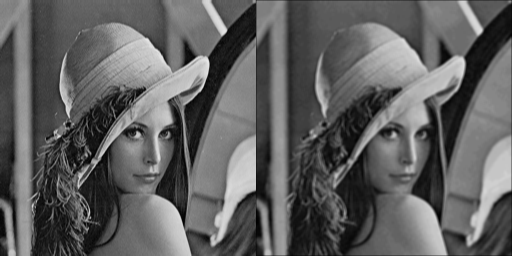

In [78]:
horizontal_img = np.concatenate((Lenna.T, output), axis=1)

# Converte image to Pillow
new_img = Image.fromarray(horizontal_img)

# Show image in Colab
new_img